### Δεδομένα

Data Link: https://www.cryptodatadownload.com/data/binance/ 

Τα δεδομένα που χρησιμοποιούμε είναι από την πλατφόρμα της binance.

### Λίγες πληρφορίες για αυτά:

Περιέχουν τις πληροφορίες του bitcoin ανά λεπτό.


Επίσης η πληροφορία που μας ενδιαφέρει είναι το close του BTC. Το close είναι η τιμή που διαμορφόθηκε εκείνη τη στιγμή στο bitcoin. Το volume είναι η ποσότητα που αγοράστηκε/πουλήθηκε εκείνη τι στιγμή. 

'Αρα στην ουσία το close είναι η τιμή ενός BTC που συναλλάχθηκε εκέίνη τη στιγμή και το volume είναι η ποσότητα που συναλλάχθηκε.

Το open είναι η τιμή που άνοιξε στο bitcoin, το low είναι η χαμηλότερη τιμή πώλησης του ανοίγματος και το high η ηψυλότερη τιμή

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import mplfinance as mpf
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.preprocessing import MinMaxScaler
import random
import time
import copy
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
import tensorflow as tf
%matplotlib inline

## Import data

In [2]:
btc_input_df  = pd.read_csv("BTC-USD.csv", parse_dates=["time"], nrows=1440)
btc_input_df.head()

,time,low,high,open,close,volume
0,2021-10-30 03:00:00,61868.81,61920.00,61888.18,61919.98,2.946079
1,2021-10-30 02:59:00,61882.74,61912.67,61903.16,61882.74,2.942357
2,2021-10-30 02:58:00,61854.82,61907.96,61854.82,61903.15,3.047848
3,2021-10-30 02:57:00,61848.04,61883.02,61883.01,61851.39,3.381070
4,2021-10-30 02:56:00,61879.33,61925.42,61907.47,61882.28,5.663128


In [3]:
btc_input_df = btc_input_df.set_index('time')
btc_input_df.head()

,low,high,open,close,volume
time,,,,,
2021-10-30 03:00:00,61868.81,61920.00,61888.18,61919.98,2.946079
2021-10-30 02:59:00,61882.74,61912.67,61903.16,61882.74,2.942357
2021-10-30 02:58:00,61854.82,61907.96,61854.82,61903.15,3.047848
2021-10-30 02:57:00,61848.04,61883.02,61883.01,61851.39,3.381070
2021-10-30 02:56:00,61879.33,61925.42,61907.47,61882.28,5.663128


In [4]:
btc_input_df = btc_input_df.sort_index()
btc_input_df.head()

,low,high,open,close,volume
time,,,,,
2021-10-29 03:01:00,61649.50,61681.09,61649.50,61665.24,2.201539
2021-10-29 03:02:00,61603.45,61665.50,61665.24,61606.40,1.898041
2021-10-29 03:03:00,61593.32,61611.45,61605.16,61596.48,2.279936
2021-10-29 03:04:00,61546.11,61604.47,61596.47,61604.47,6.702590
2021-10-29 03:05:00,61601.65,61699.11,61601.69,61693.13,6.331365


In [5]:
print(btc_input_df.shape)
print("------------------------")
print(btc_input_df.info())

(1440, 5)
------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1440 entries, 2021-10-29 03:01:00 to 2021-10-30 03:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   low     1440 non-null   float64
 1   high    1440 non-null   float64
 2   open    1440 non-null   float64
 3   close   1440 non-null   float64
 4   volume  1440 non-null   float64
dtypes: float64(5)
memory usage: 67.5 KB
None


In [6]:
btc_input_df.head()

,low,high,open,close,volume
time,,,,,
2021-10-29 03:01:00,61649.50,61681.09,61649.50,61665.24,2.201539
2021-10-29 03:02:00,61603.45,61665.50,61665.24,61606.40,1.898041
2021-10-29 03:03:00,61593.32,61611.45,61605.16,61596.48,2.279936
2021-10-29 03:04:00,61546.11,61604.47,61596.47,61604.47,6.702590
2021-10-29 03:05:00,61601.65,61699.11,61601.69,61693.13,6.331365


In [7]:
btc_input_df.tail()

,low,high,open,close,volume
time,,,,,
2021-10-30 02:56:00,61879.33,61925.42,61907.47,61882.28,5.663128
2021-10-30 02:57:00,61848.04,61883.02,61883.01,61851.39,3.381070
2021-10-30 02:58:00,61854.82,61907.96,61854.82,61903.15,3.047848
2021-10-30 02:59:00,61882.74,61912.67,61903.16,61882.74,2.942357
2021-10-30 03:00:00,61868.81,61920.00,61888.18,61919.98,2.946079


## Plot informations

<AxesSubplot:title={'center':'Bitcoin Price'}, xlabel='time'>

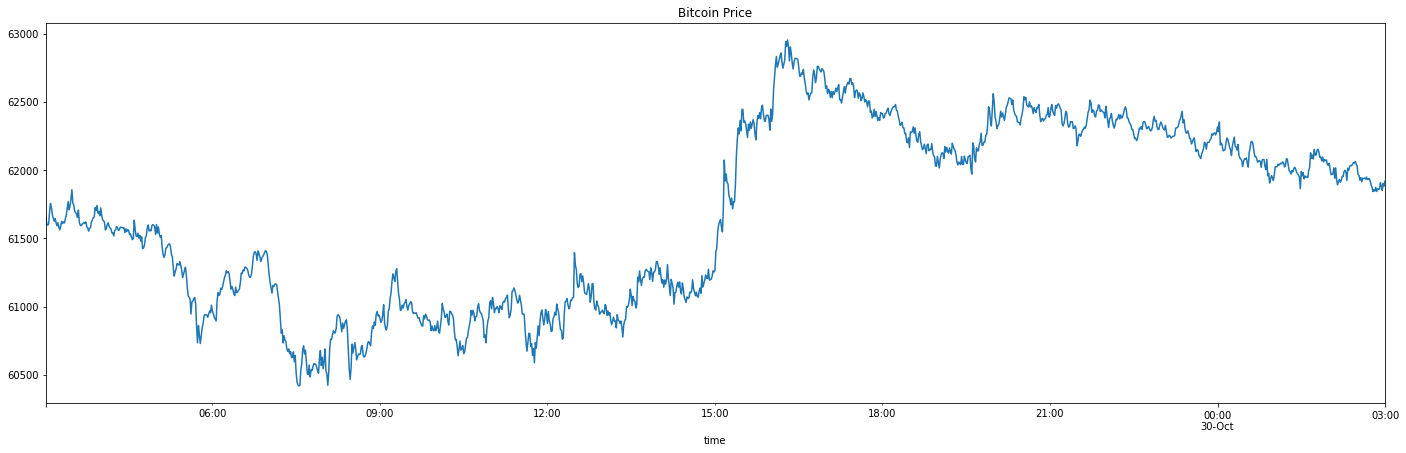

In [8]:
btc_input_df.close.plot(figsize=(24,7), title="Bitcoin Price")

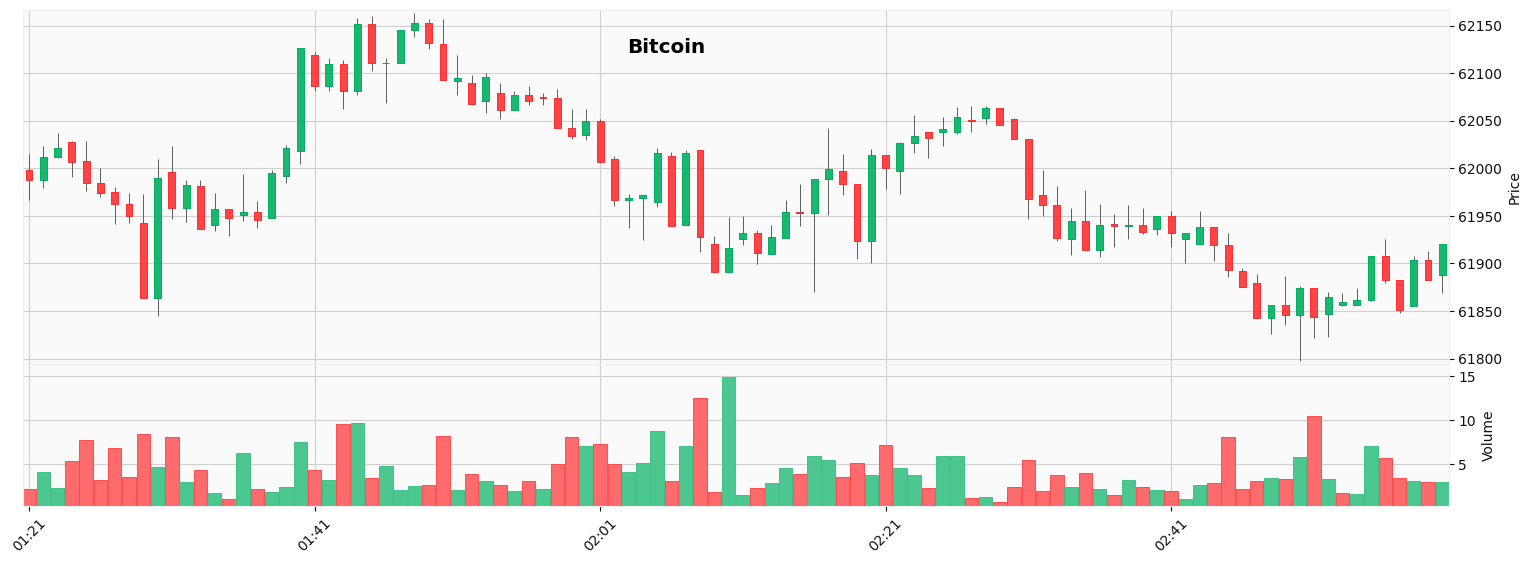

In [9]:
mpf.plot(btc_input_df[-100:],
         title="Bitcoin",
         type="candle", 
         volume=True,
         tight_layout=True,
         figratio=(20,7),
         style='yahoo',)

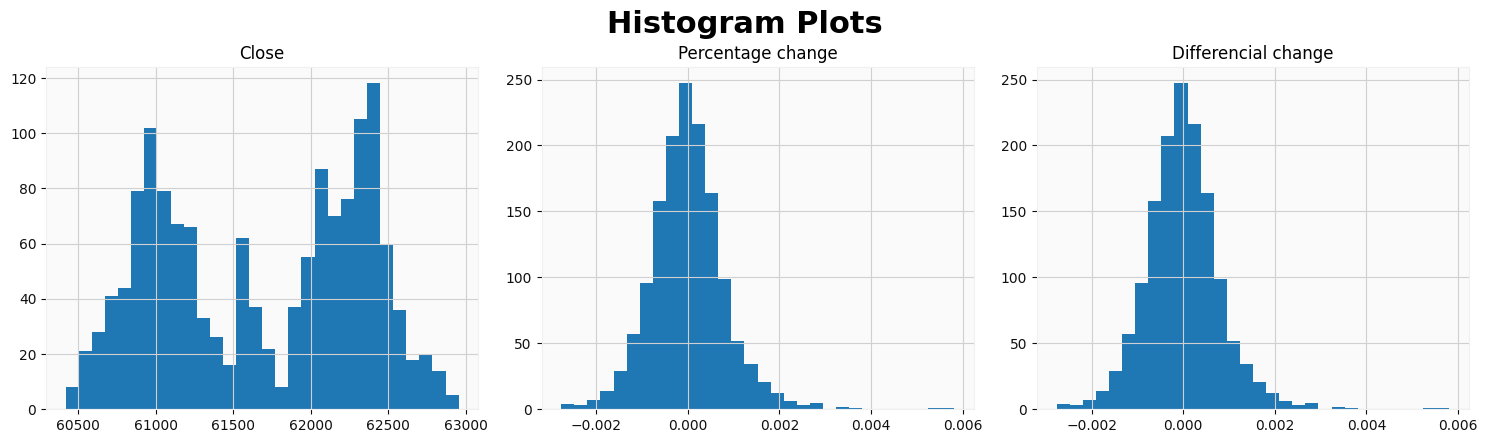

In [10]:
# ιστογράμματα 
plt.figure(figsize=(15,12))
plt.suptitle('Histogram Plots', fontsize=22)

plt.subplot(3,3,1)
btc_input_df.close.hist(bins=30)
plt.title('Close')

plt.subplot(3,3,2)
btc_input_df.close.pct_change().hist(bins=30)
plt.title('Percentage change')

plt.subplot(3,3,3)
btc_input_df.close.pct_change().hist(bins=30)
plt.title('Differencial change')

plt.tight_layout()

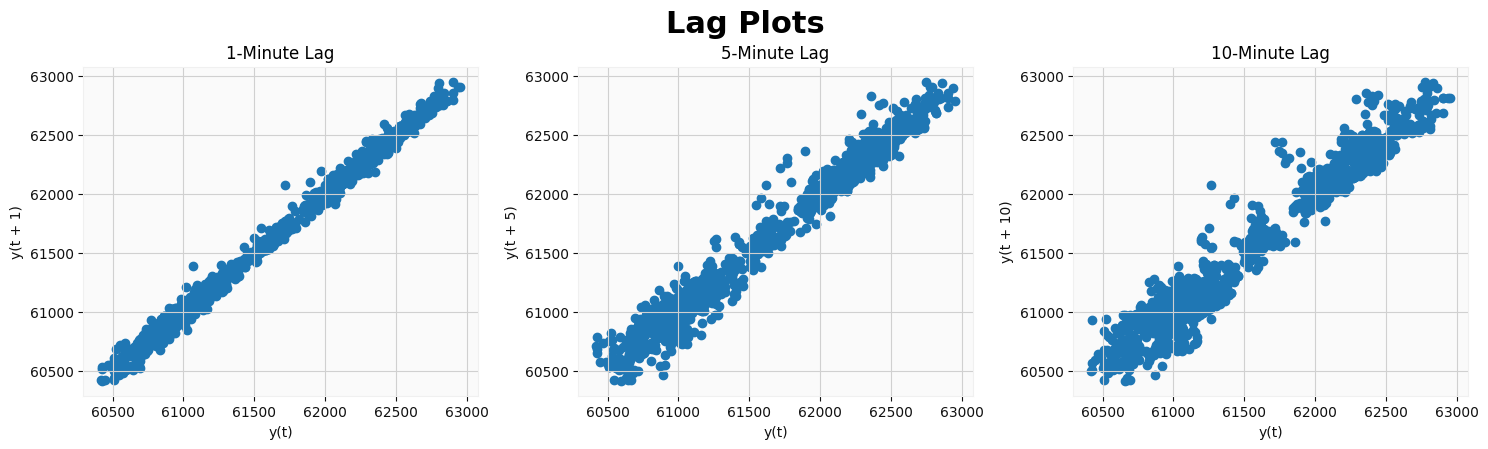

In [11]:
# κάνουμε plot το corelation 
plt.figure(figsize=(15,12))
plt.suptitle('Lag Plots', fontsize=22)

plt.subplot(3,3,1)
pd.plotting.lag_plot(btc_input_df['close'], lag=1) #minute lag
plt.title('1-Minute Lag')

plt.subplot(3,3,2)
pd.plotting.lag_plot(btc_input_df['close'], lag=5) 
plt.title('5-Minute Lag')

plt.subplot(3,3,3)
pd.plotting.lag_plot(btc_input_df['close'], lag=10) 
plt.title('10-Minute Lag')

plt.tight_layout()

## Pre processing data for LSTM model

In [12]:
btc_closing_price = btc_input_df['close'].copy()
btc_closing_price.head()

time
2021-10-29 03:01:00    61665.24
2021-10-29 03:02:00    61606.40
2021-10-29 03:03:00    61596.48
2021-10-29 03:04:00    61604.47
2021-10-29 03:05:00    61693.13
Name: close, dtype: float64

In [13]:
df_train= btc_closing_price[:-200].copy()
df_test= btc_closing_price[-200:].copy()

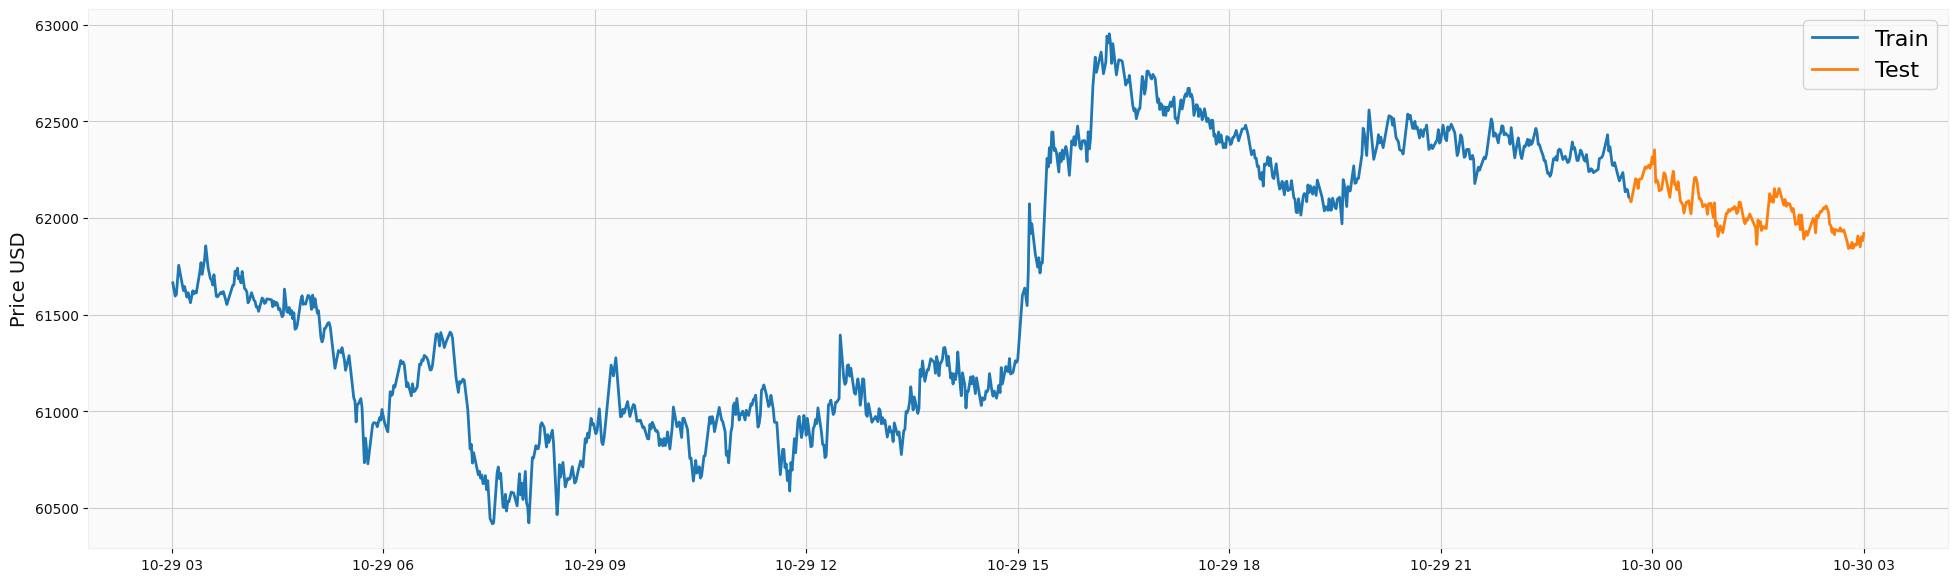

In [14]:
fig, ax = plt.subplots(1, figsize=(24, 7))
ax.plot(df_train, label='Train', linewidth=2)
ax.plot(df_test, label='Test', linewidth=2)
ax.set_ylabel('Price USD', fontsize=14)
ax.set_title('', fontsize=16)
ax.legend(loc='best', fontsize=16)

In [15]:
df_train= df_train.values.reshape(df_train.shape[0],1)
df_test= df_test.values.reshape(df_test.shape[0],1)

In [16]:
df_train.shape

(1240, 1)

In [17]:
"""
Ο λόγος που χωρίζουμε πρώτα τα δεδομένα μας και μετά τα κανονικοποιούμε
είναι διότι αν κάναμε το αντίθετο, όταν θα γινόταν το scaling, θα χρησιμοποιούνταν
(ως σημείο αναφοράς) τα δεδομένα που έχουμε ως training και αυτό θα επηρέαζε τα δεδομένα εκαπίδευσης.
Στην ουσία θα είχαμ "διαρροή" των αποτελεσμάτων του training set
"""
scaler_train = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler_train.fit_transform(df_train)

scaler_test = MinMaxScaler(feature_range=(0, 1))
scaled_test = scaler_test.fit_transform(df_test)

In [18]:
"""
Θα δημιουργήσουμε μια συνάρτηση που θα χωρίζει το datest σε input που θα δέχεται
το μοντέλο και τα label που πρέπει να προβλέπει.

Για παράδειγμα αν τα δεδομένα μας είχαν την μορφή [1, 2, 3, 4, 5, 6]
τότε τα input που θα παίρνει το μοντέλο μας και το αντίστοιχο output , θα ήταν κάπως έτσι:

Input | Output
1, 2      3
2, 3      4
3, 4      5
4, 5      6


Τα LSTMs δέχονται σαν είσοδο δεδομένα 2 διαστάσεων.
Η πρώτη διάσταση είναι ο αριθμός των χρονικών βημάτων, στο παράδειγμα μας είναι 2,
και η δεύτερη διάσταση είναι ο αριθμός των παρατηρήσεων ανά χρονικό βήμα, στο παράδειγμα είναι 1

"""
def dataset_generator_lstm(dataset, look_back=10):
    """
    Συνάρτηση που επιστρέφει όσα περιγράψαμε παραπάνω. Η παράμετρος
    look back προσδιορίζει πόσα προηγούμενα timesteps θα λάβουμε υπόψη
    για να προβλέψουμε το επόμενο timestep.
    Για παράδειγμα αν θέλουμε να προβλέψουμε τι θα γίνει την χρονική στιγμή t+1 (όπου t είναι η τωρινη
    χρονική στιγμή.) με look back ίσο με 10 , τότε θα χρησιμοποιουθούν τα δεδομένα της χρονική στιγμής
    t-9 , t-8, ... , t-1, t-0
    """    
    dataX, dataY = [], []
    
    for i in range(len(dataset) - look_back):   
        window_size_x = dataset[i:(i + look_back)]
        dataX.append(window_size_x)
        dataY.append(dataset[i + look_back])
        
    return np.array(dataX), np.array(dataY)

trainX, trainY = dataset_generator_lstm(scaled_train)
testX, testY = dataset_generator_lstm(scaled_test)

print("trainX: ", trainX.shape)
print("trainY: ", trainY.shape)
print("testΧ: ", testX.shape)
print("testY", testY.shape)

trainX:  (1230, 10, 1)
trainY:  (1230, 1)
testΧ:  (190, 10, 1)
testY (190, 1)


Για το LSTM πρέπει να αναδιαμορφώσoyme την είσοδο ώστε να είναι ένας τρισδιάστατος πίνακας 
[δείγματα , χρονικά βήματα, χαρακτηριστικά]
Δείγματα (Samples): Είναι το len(trainX) , δηλαδή η ποσότητα των data points που έχουμε
Χαρακτηριστικά (Features): Η ποσότητα των χαρακτηριστικών σε κάθε timestep. Στην συγκεκριμένη περίπτωση το χαρακτηριστικό που έχουμε είναι η τιμή του bitcoin.  

In [19]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1 ))

print("Shape of trainX: ", trainX.shape)
print("Shape of testX: ", testX.shape)

Shape of trainX:  (1230, 10, 1)
Shape of testX:  (190, 10, 1)


## Create LSTM model

In [20]:
model = Sequential()

# model.add(LSTM(units = 32, activation = 'relu', return_sequences=True, input_shape = (trainX.shape[1], trainX.shape[2])))
# model.add(Dropout(0.2))

model.add(LSTM(units = 32, activation = 'relu', return_sequences=False, input_shape = (trainX.shape[1], trainX.shape[2])))
model.add(Dropout(0.2))

# model.add(LSTM(units = 64, activation = 'relu', return_sequences=True, input_shape = (trainX.shape[1], trainX.shape[2])))
# model.add(Dropout(0.2))

# model.add(LSTM(units = 64, activation = 'relu', return_sequences=True, input_shape = (trainX.shape[1], trainX.shape[2])))
# model.add(Dropout(0.2))

# model.add(LSTM(units = 64, input_shape = (trainX.shape[1], trainX.shape[2])))
# model.add(Dropout(0.2))

model.add(Dense(units = 1))

In [21]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
checkpoint_path = f'./models/best_model_{int(time.time())}.hdf5'
checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')

earlystopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
callbacks = [checkpoint, earlystopping]
history = model.fit(trainX, trainY, batch_size = 32, epochs = 100, 
                    verbose=1, shuffle=False, 
                    validation_split=0.2, callbacks=callbacks)

Epoch 1/100
17/31 [===============>..............] - ETA: 0s - loss: 0.0695 
Epoch 00001: val_loss improved from inf to 0.02735, saving model to ./models\best_model_1648236056.hdf5
31/31 [==============================] - 1s 11ms/step - loss: 0.0819 - val_loss: 0.0274
Epoch 2/100
18/31 [================>.............] - ETA: 0s - loss: 0.0237
Epoch 00002: val_loss improved from 0.02735 to 0.00312, saving model to ./models\best_model_1648236056.hdf5
31/31 [==============================] - 0s 5ms/step - loss: 0.0199 - val_loss: 0.0031
Epoch 3/100
19/31 [=================>............] - ETA: 0s - loss: 0.0073
Epoch 00003: val_loss improved from 0.00312 to 0.00068, saving model to ./models\best_model_1648236056.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 0.0113 - val_loss: 6.8063e-04
Epoch 4/100
19/31 [=================>............] - ETA: 0s - loss: 0.0081
Epoch 00004: val_loss did not improve from 0.00068
31/31 [==============================] - 0s 4ms/step - los

In [22]:
model_from_saved_checkpoint = load_model(checkpoint_path)

## How good is our model?

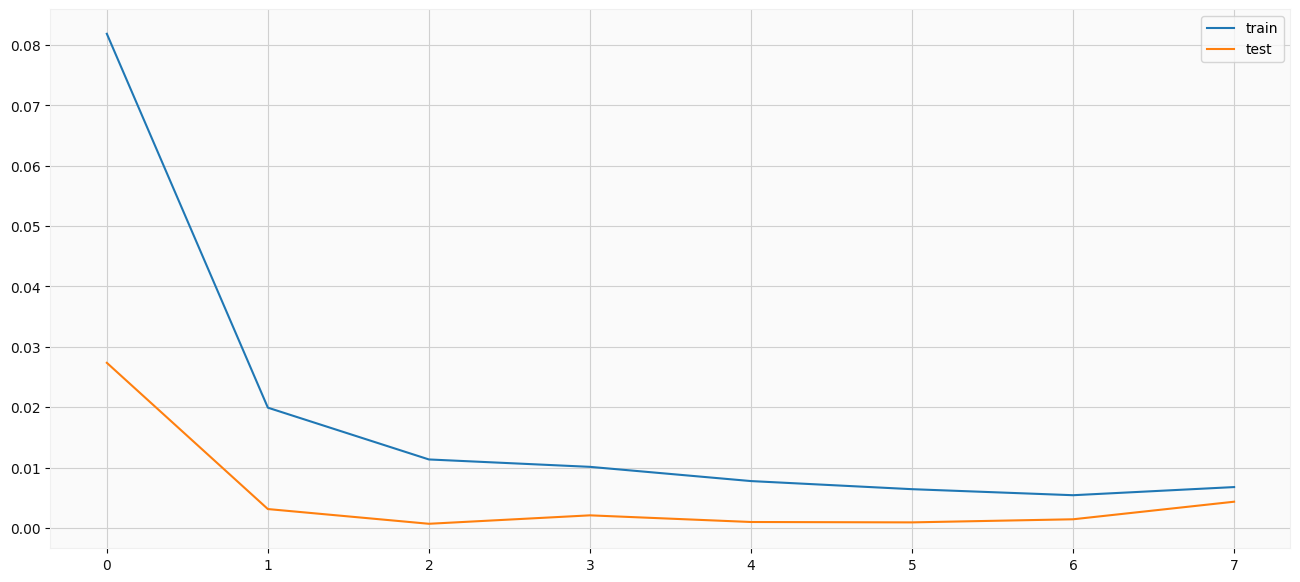

In [23]:
plt.figure(figsize=(16,7))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [24]:
# Τα μετατρέπουμε στην κανονική τους μορφή και κάνουμε τις προβλέψεις
predicted_btc_price_test_data = model_from_saved_checkpoint.predict(testX)
predicted_btc_price_test_data = scaler_test.inverse_transform(predicted_btc_price_test_data.reshape(testX.shape[0], 1))
test_actual = scaler_test.inverse_transform(testY.reshape(testX.shape[0], 1))

def rmse(predictions, targets):
    return np.sqrt(np.mean((predictions-targets)**2))

print(f"Mean Absolute Error: {mean_absolute_error(predicted_btc_price_test_data, test_actual)}")
print(f"Mean Square Error: {mean_squared_error(predicted_btc_price_test_data, test_actual)}")
print(f"r2 score: {r2_score(predicted_btc_price_test_data, test_actual)}")
print(f"Root Mean Square Error: {rmse(predicted_btc_price_test_data, test_actual)}")

Mean Absolute Error: 49.21462993421041
Mean Square Error: 3374.144106385678
r2 score: 0.557155565409718
Root Mean Square Error: 58.087383366663005


In [25]:
# Τα μετατρέπουμε στην κανονική τους μορφή και κάνουμε τις προβλέψεις
predicted_btc_price_train_data = model_from_saved_checkpoint.predict(trainX)
predicted_btc_price_train_data = scaler_train.inverse_transform(predicted_btc_price_train_data.reshape(trainX.shape[0], 1))
train_actual = scaler_train.inverse_transform(trainY.reshape(trainY.shape[0], 1))

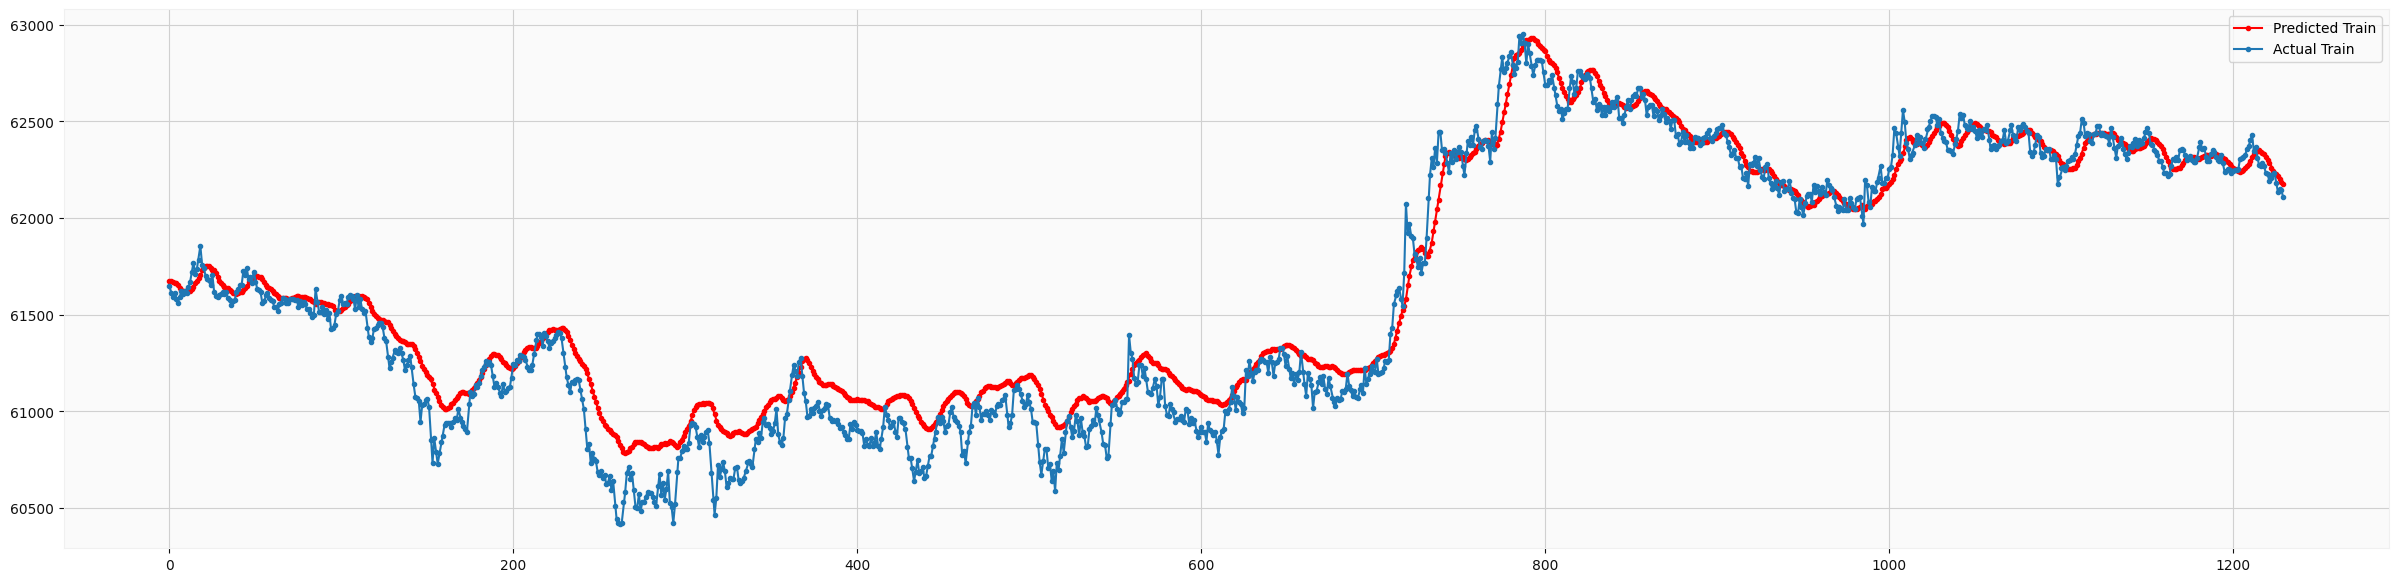

In [26]:
plt.figure(figsize=(30,7))
plt.plot(predicted_btc_price_train_data, 'r', marker='.', label='Predicted Train')
plt.plot(train_actual, marker='.', label='Actual Train')
plt.legend()
plt.show()

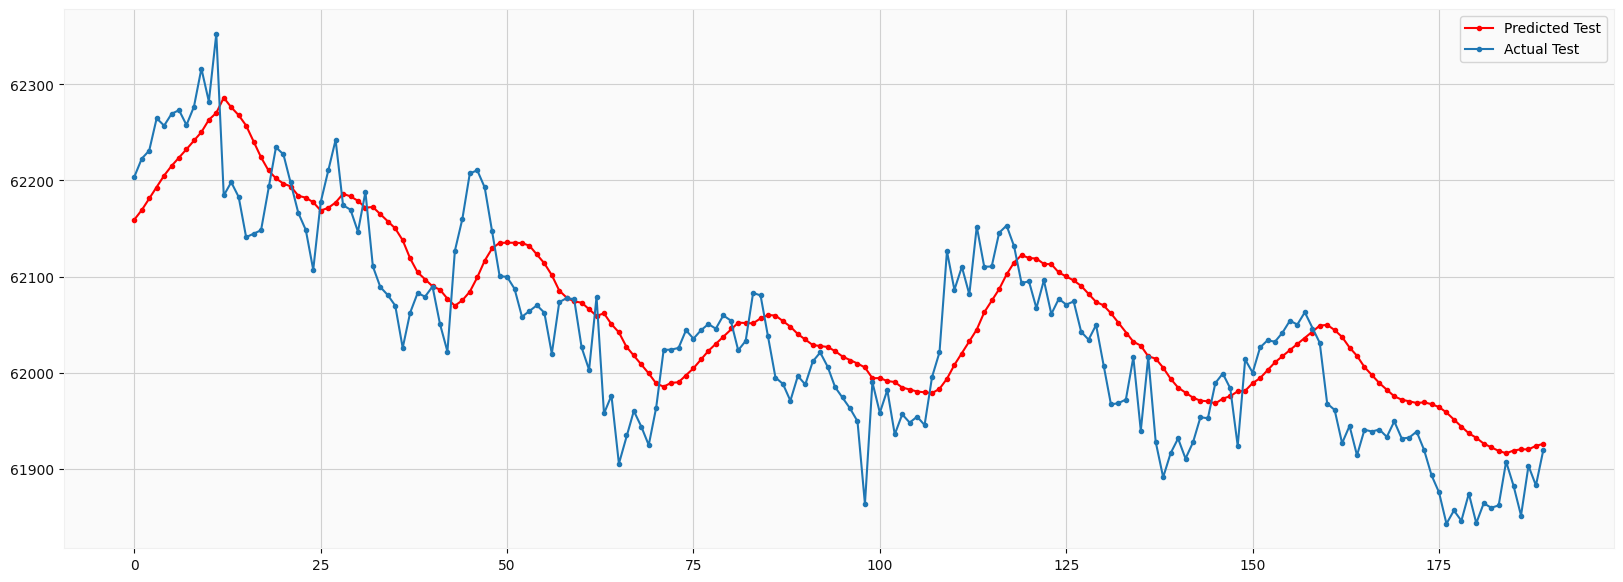

In [27]:
plt.figure(figsize=(20,7))
plt.plot(predicted_btc_price_test_data, 'r', marker='.', label='Predicted Test')
plt.plot(test_actual, marker='.', label='Actual Test')
plt.legend()
plt.show()

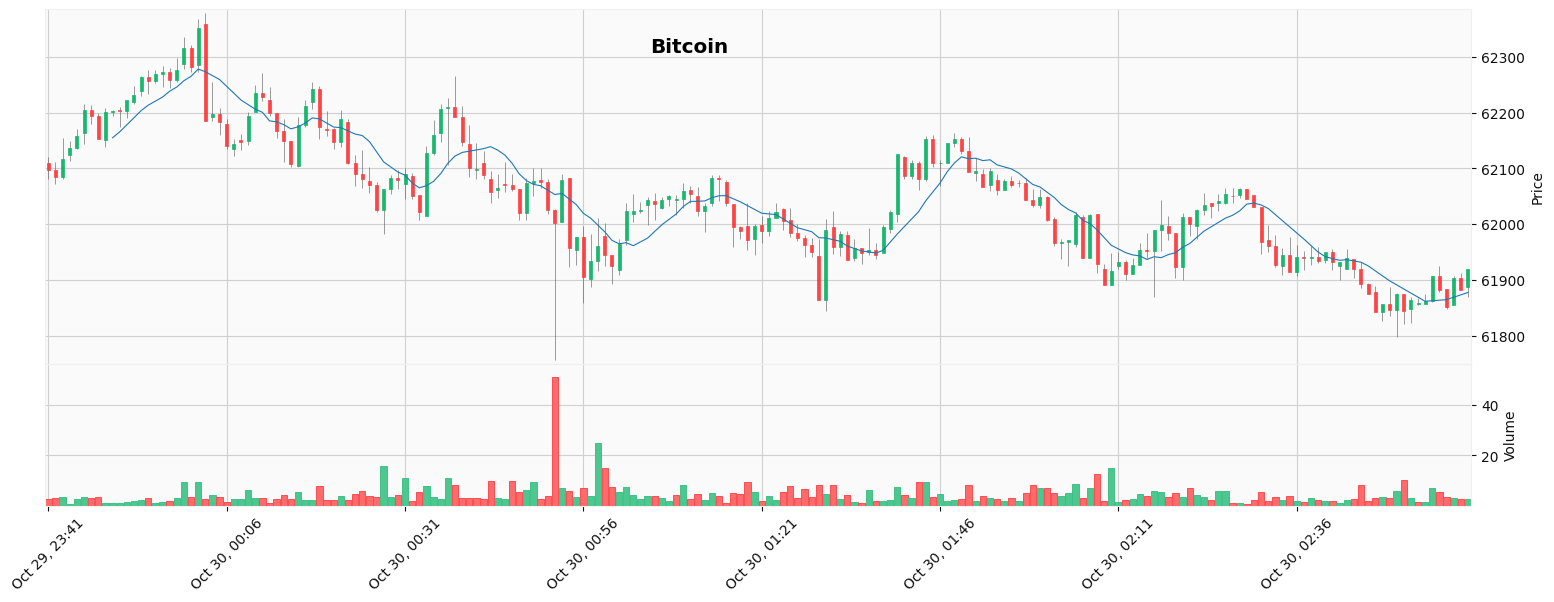

In [28]:
mpf.plot(btc_input_df[-200:],
         title="Bitcoin",
         type="candle", 
         volume=True, 
         mav=(10),
         tight_layout=True,
         figratio=(20,7),
         style='yahoo',)

In [29]:
testX.shape

(190, 10, 1)

## Forecasting

In [30]:
# για να προβλέψουμε την τιμή της επ΄όμενης μέρας που δεν έχουμε στα δεδομένα μας, θα πρέπει να
# περάσουμε στο μον΄τέλο μας τις look_back μέρες και θα πάρουμε σαν output την επόμενη μέρα
# Όμοια για να πάρουμε την επόμενη μέρα από την αυριανή μέρα, θα δώσουμε σαν input στο μοντέλο μας
# τα δεδομένα των lookback - 1 μερών για να πάρουμε σαν output την μεθαυριανή μέρα
lookback_period = 15
testX_last_days = testX[testX.shape[0] - lookback_period:]
print(testX_last_days.shape)
predicted_days_forecast_price_test_x = []

for i in range(lookback_period):  
    predicted_forecast_price_test_x = model_from_saved_checkpoint.predict(testX_last_days[i:i+1])
    predicted_forecast_price_test_x = scaler_test.inverse_transform(predicted_forecast_price_test_x.reshape(-1, 1))
    predicted_days_forecast_price_test_x.append(predicted_forecast_price_test_x)

predicted_days_forecast_price_test_x = np.array(predicted_days_forecast_price_test_x)
predicted_days_forecast_price_test_x = predicted_days_forecast_price_test_x.flatten()

predicted_btc_price_test_data = predicted_btc_price_test_data.flatten()
predicted_btc_test_concatenated = np.concatenate((predicted_btc_price_test_data, predicted_days_forecast_price_test_x))


(15, 10, 1)


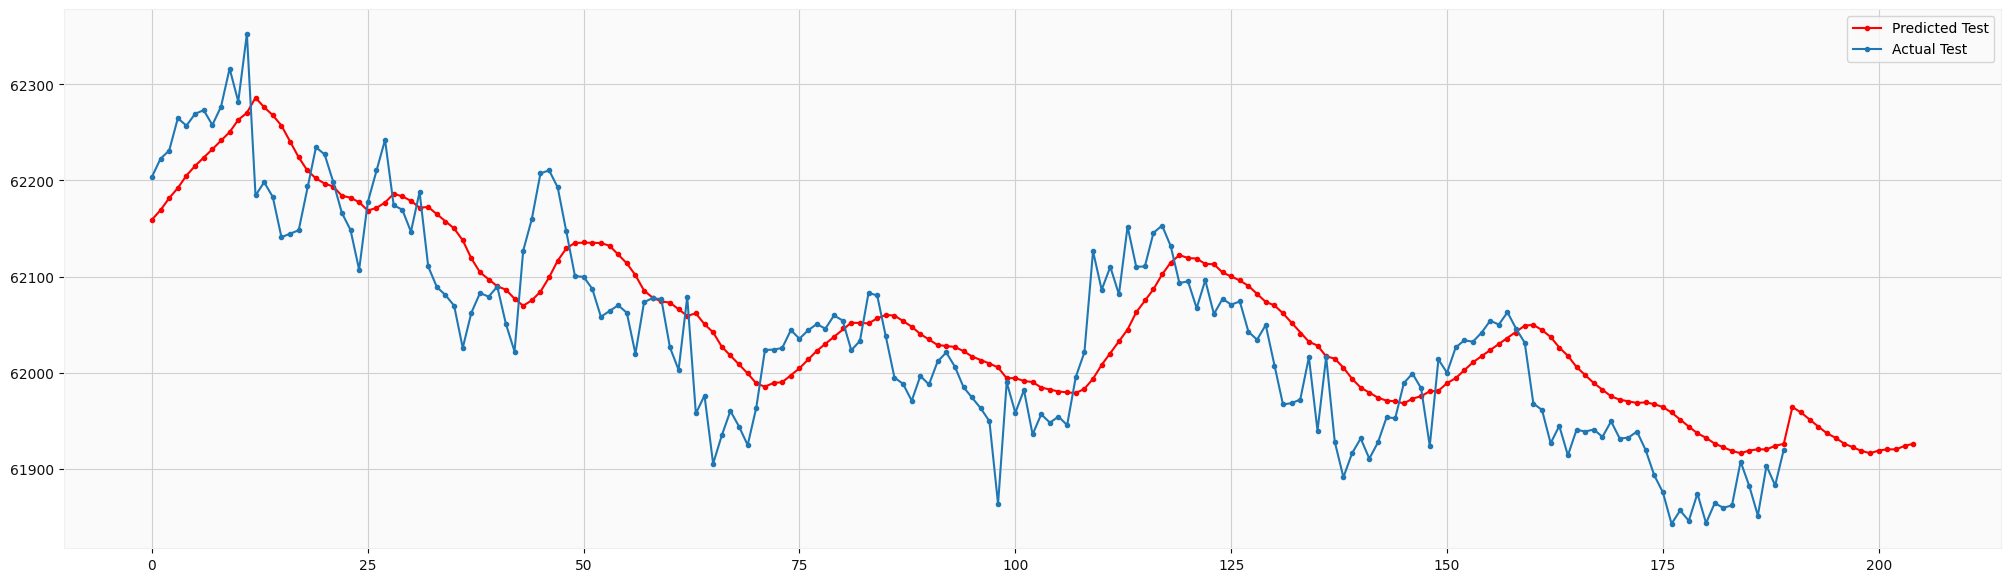

In [31]:
plt.figure(figsize=(25,7))
plt.plot(predicted_btc_test_concatenated, 'r', marker='.', label='Predicted Test')
plt.plot(test_actual, marker='.', label='Actual Test')
plt.legend()
plt.show()

## Create dataframe for our trade positions

In [32]:
df_strategy_actual = pd.DataFrame(test_actual)
df_strategy_predicted = pd.DataFrame(predicted_btc_price_test_data)

df_strategy_actual = df_strategy_actual.rename(columns={0: "close"})
df_strategy_predicted = df_strategy_predicted.rename(columns={0: "close"})

In [33]:
def classify(current, future):
    if future is None:
        return
    """
    Επιστρέφει 1 αν η τιμή στο μέλλον είναι αυξημένη ή
    -1 αν η τιμή στο μέλλον είναι μειωμένη
    """
    if float(future) > float(current):
        return 1
    elif float(future) < float(current):
        return -1

In [34]:
df_strategy_actual['future'] = df_strategy_actual["close"].shift(-1)
df_strategy_predicted['future'] = df_strategy_predicted["close"].shift(-1)
df_strategy_actual['target'] = list(map(classify, df_strategy_actual["close"], df_strategy_actual["future"]))
df_strategy_predicted['target'] = list(map(classify, df_strategy_predicted["close"], df_strategy_predicted["future"]))

frames = [df_strategy_actual, df_strategy_predicted]
result = pd.concat(frames, axis=1, ignore_index=True)
result = result.rename(columns={0: "actual_close", 
                                1:"actual_future_close", 
                                2:"actual_target",
                                3:"predicted_close",
                                4:"predicted_future_close",
                                5:"predicted_target"})
result.dropna(inplace = True)
result["prcnt_change"] = (result['predicted_future_close'] - result['predicted_close'] ) / result['predicted_close']
result.head(30)

,actual_close,actual_future_close,actual_target,predicted_close,predicted_future_close,predicted_target,prcnt_change
0,62203.73,62222.69,1.0,62159.214844,62169.195312,1.0,0.000161
1,62222.69,62231.10,1.0,62169.195312,62181.648438,1.0,0.000200
2,62231.10,62264.69,1.0,62181.648438,62192.160156,1.0,0.000169
3,62264.69,62257.02,-1.0,62192.160156,62205.128906,1.0,0.000209
4,62257.02,62269.35,1.0,62205.128906,62215.160156,1.0,0.000161
5,62269.35,62273.15,1.0,62215.160156,62223.417969,1.0,0.000133
6,62273.15,62257.69,-1.0,62223.417969,62232.492188,1.0,0.000146
7,62257.69,62276.72,1.0,62232.492188,62241.996094,1.0,0.000153
8,62276.72,62316.40,1.0,62241.996094,62250.332031,1.0,0.000134
9,62316.40,62282.10,-1.0,62250.332031,62263.070312,1.0,0.000205


## RRL Stock Trading

In [35]:
def sharpe_ratio(rets):
    return rets.mean() / rets.std()

def positions(x, theta):
    M = len(theta) - 2
    T = len(x)
    Ft = np.zeros(T)
    for t in range(M, T):
        xt = np.concatenate([[1], x[t - M:t], [Ft[t - 1]]])
        Ft[t] = np.tanh(np.dot(theta, xt))
    return Ft

def returns(Ft, x, delta=0):
    T = len(x)
    rets = Ft[0:T - 1] * x[1:T] - delta * np.abs(Ft[1:T] - Ft[0:T - 1])
    return np.concatenate([[0], rets])

def gradient(x, theta, delta):
    Ft = positions(x, theta)
    R = returns(Ft, x, delta)
    T = len(x)
    M = len(theta) - 2
    
    A = np.mean(R)
    B = np.mean(np.square(R))
    S = A / np.sqrt(B - A ** 2)

    dSdA = S * (1 + S ** 2) / A
    dSdB = -S ** 3 / 2 / A ** 2
    dAdR = 1. / T
    dBdR = 2. / T * R
    
    grad = np.zeros(M + 2)  
    dFpdtheta = np.zeros(M + 2)  
    
    for t in range(M, T):
        xt = np.concatenate([[1], x[t - M:t], [Ft[t-1]]])
        dRdF = -delta * np.sign(Ft[t] - Ft[t-1])
        dRdFp = x[t] + delta * np.sign(Ft[t] - Ft[t-1])
        dFdtheta = (1 - Ft[t] ** 2) * (xt + theta[-1] * dFpdtheta)
        dSdtheta = (dSdA * dAdR + dSdB * dBdR[t]) * (dRdF * dFdtheta + dRdFp * dFpdtheta)
        grad = grad + dSdtheta
        dFpdtheta = dFdtheta
        
    return grad, S

def train(x, epochs=2000, M=8, commission=0, learning_rate = 0.3):
    theta = np.random.rand(M + 2)
    sharpes = np.zeros(epochs) 
    for i in range(epochs):
        grad, sharpe = gradient(x, theta, commission)
        theta = theta + grad * learning_rate
        sharpes[i] = sharpe
    
    print("finished training")
    return theta, sharpes

In [36]:
rets = btc_input_df['close'].copy().diff()[1:1440]

x = np.array(rets)

N = 1240 
P = 150
x_train = x[:N]
x_test = x[-P:]

std_train = np.std(x_train)
std_test = np.std(x_test)

# mean = np.mean(x_train)

# normalize
x_train = x_train / std_train
x_test = x_test  / std_test

x_test_rrn = x_test[:]

In [37]:
rets.head()

time
2021-10-29 03:02:00   -58.84
2021-10-29 03:03:00    -9.92
2021-10-29 03:04:00     7.99
2021-10-29 03:05:00    88.66
2021-10-29 03:06:00    62.83
Name: close, dtype: float64

In [38]:
rets.tail()

time
2021-10-30 02:56:00   -25.20
2021-10-30 02:57:00   -30.89
2021-10-30 02:58:00    51.76
2021-10-30 02:59:00   -20.41
2021-10-30 03:00:00    37.24
Name: close, dtype: float64

In [39]:
%%time
np.random.seed(0)
print('start training')
theta, sharpes = train(x_train, epochs=1000, M=10, commission=0, learning_rate=0.5)

start training
finished training
Wall time: 42 s


Sharpe ratio: 0.14654547353813138


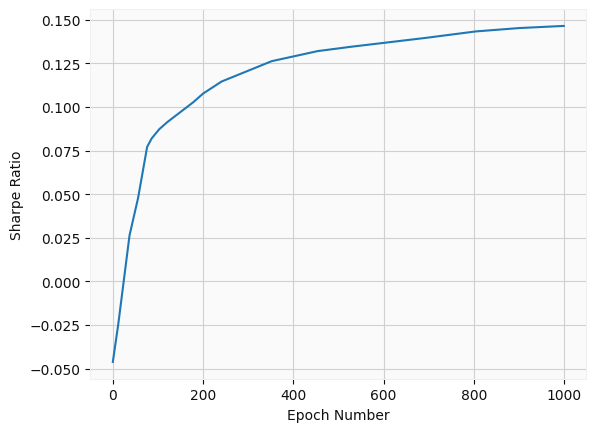

In [40]:
plt.plot(sharpes)
plt.xlabel('Epoch Number')
plt.ylabel('Sharpe Ratio')
print(f"Sharpe ratio: {sharpes[-1]}")

In [41]:
train_returns = returns(positions(x_train, theta), x_train)
test_returns = returns(positions(x_test, theta), x_test)

train_positions = positions(x_train, theta)
test_positions = positions(x_test, theta)

# for lstm predictions
x_lstm_test = np.diff(predicted_btc_price_test_data)
x_lstm_test = x_lstm_test / np.std(x_lstm_test)

lstm_returns= returns(positions(x_lstm_test, theta), x_test)
lstm_positions = positions(x_lstm_test, theta)

RL model on train data: 161.93787161850395 USD
RL model on test data: 17.213842954657906 USD
RL model on lstm predictions: -5.47524544916652 USD


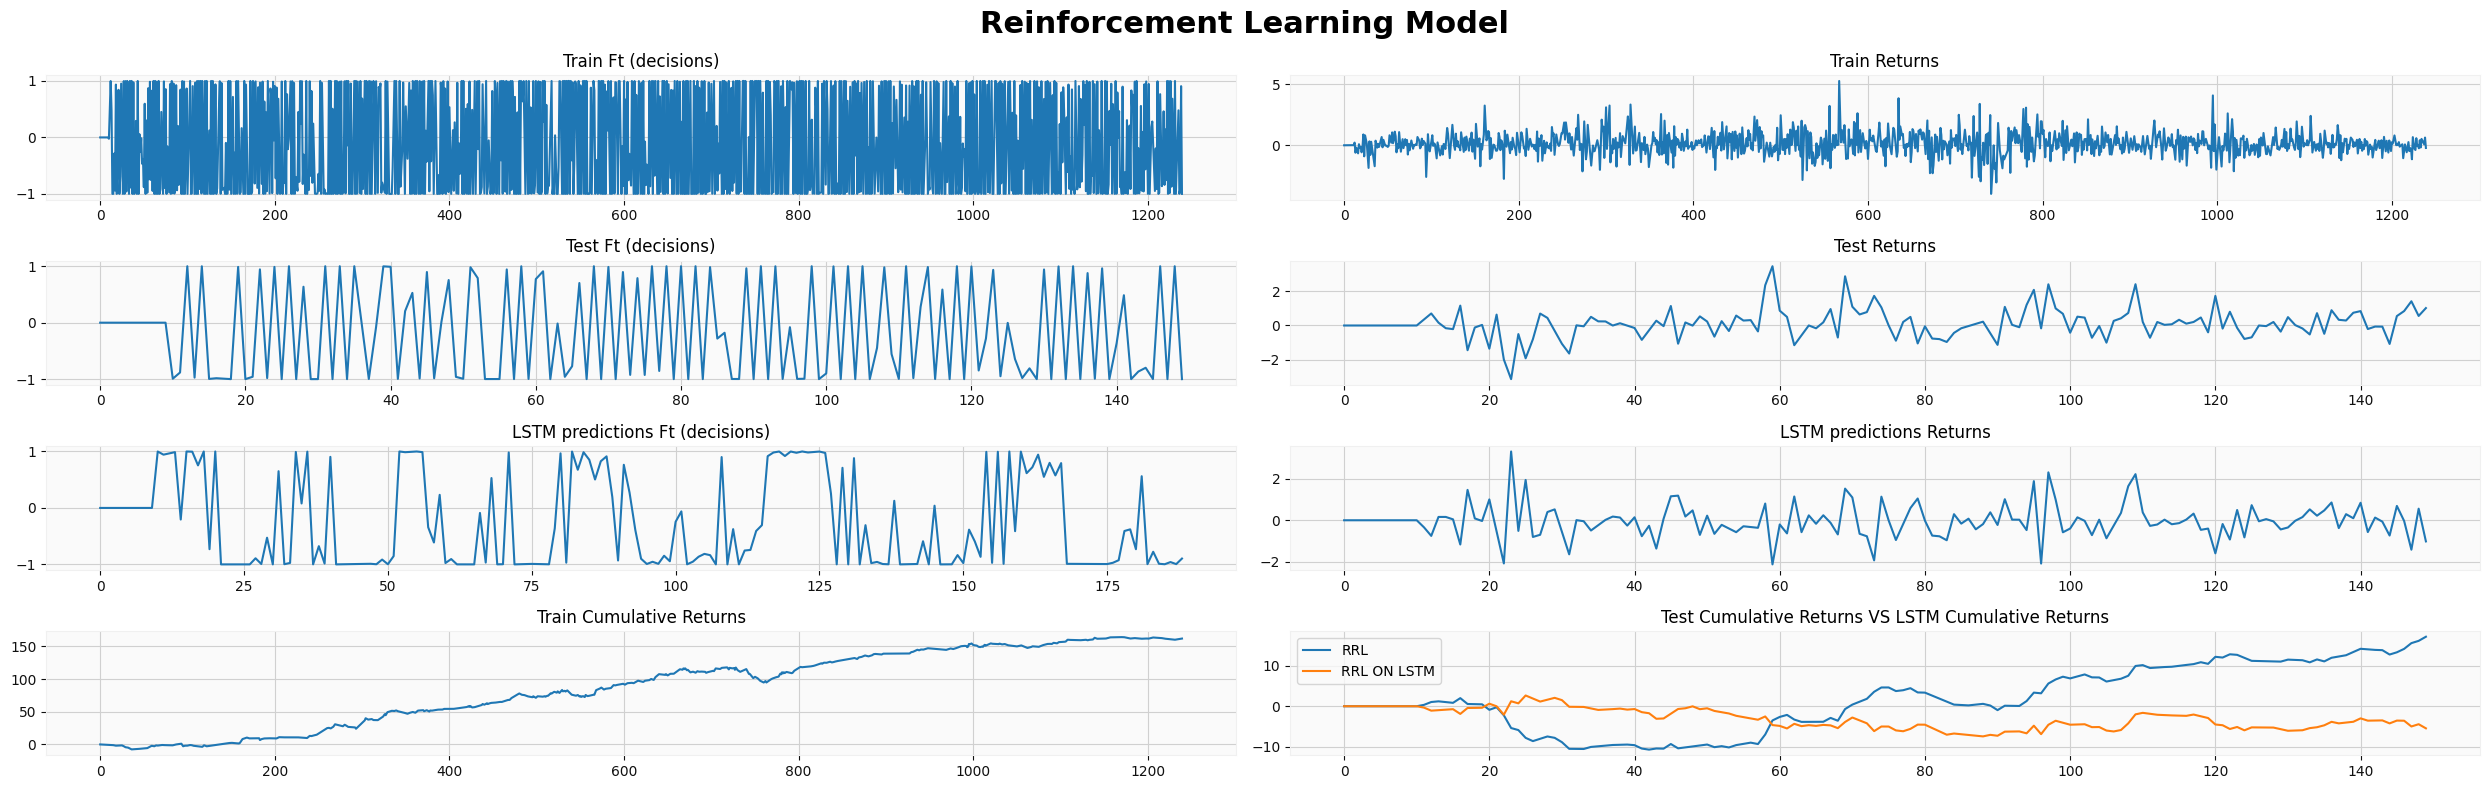

In [42]:
plt.figure(figsize=(25,8))
plt.suptitle('Reinforcement Learning Model', fontsize=22)
plt.subplot(4,2,1)
plt.plot(train_positions)
plt.title("Train Ft (decisions)")

plt.subplot(4,2,2)
plt.plot(train_returns)
plt.title("Train Returns")

plt.subplot(4,2,3)
plt.plot(test_positions)
plt.title("Test Ft (decisions)")

plt.subplot(4,2,4)
plt.plot(test_returns)
plt.title("Test Returns")

plt.subplot(4,2,5)
plt.plot(lstm_positions)
plt.title("LSTM predictions Ft (decisions)")

plt.subplot(4,2,6)
plt.plot(lstm_returns)
plt.title("LSTM predictions Returns")

plt.subplot(4,2,7)
plt.plot(train_returns.cumsum())
plt.title("Train Cumulative Returns")

plt.subplot(4,2,8)
plt.plot(test_returns.cumsum(), label= "RRL")
# plt.plot(x_test.cumsum(), label="Buy and Hold", linewidth=1)

plt.subplot(4,2,8)
plt.plot(lstm_returns.cumsum(), label= "RRL ON LSTM")
plt.title("Test Cumulative Returns VS LSTM Cumulative Returns")
plt.legend()

plt.tight_layout()

print(f"RL model on train data: {train_returns.cumsum()[-1]} USD" )
print(f"RL model on test data: {test_returns.cumsum()[-1]} USD")
print(f"RL model on lstm predictions: {lstm_returns.cumsum()[-1]} USD")

## Let's simulate trading movements

In [43]:
def trade_long(positions, stock_prices, usd=5000, btc=0, fee=0):
    """
    Αγοράζουμε για όσο προβλέπουμε πως θα ανέβει η τιμή και τα πουλάμε όλα 
    όταν προβλέπουμε πως θα πέσει η τιμή
    """
    cnt = 0
    total = []
    total.append(usd + btc * stock_prices[0])
    print(f"Start with: {total[0]}")
    for index in range(len(positions) - 1): 

        # αγοράζουμε
        if positions[index] > 0 and positions[index + 1] > 0 and usd > 0:
            buy = positions[index] * usd
            btc = buy / stock_prices[index] + btc
            usd = usd - buy - (fee * buy)
            cnt += 1
            total.append(usd + btc * stock_prices.iloc[index])
            continue

        # πουλάμε 
        if positions[index] < 0 and positions[index + 1] < 0 and btc > 0: 
            usd = btc * stock_prices[index] + usd - (fee * btc)
            btc = 0
            cnt += 1
            total.append(usd + btc * stock_prices.iloc[index])
            continue
    
    print(f"End with: {total[-1]}\nProfit: {total[-1] - total[0]}\n# of trades: {cnt}\n")
    return total

In [44]:
print("---RRL---")
total_rrl = trade_long(positions(x_test_rrn, theta), result['actual_close'].copy())
print("---RRL ON LSTM---")
total_rrl_lstm = trade_long(positions(x_lstm_test, theta), result['actual_close'].copy())
print("---LSTM---")
total_lstm = trade_long(result['prcnt_change'] * 100, result['actual_close'].copy())

---RRL---
Start with: 5000.0
End with: 5001.2554079596575
Profit: 1.255407959657532
# of trades: 10

---RRL ON LSTM---
Start with: 5000.0
End with: 4973.833495421507
Profit: -26.166504578493004
# of trades: 44

---LSTM---
Start with: 5000.0
End with: 4997.41587007774
Profit: -2.5841299222602174
# of trades: 63



Text(0.5, 1.0, 'PORTFOLIO')

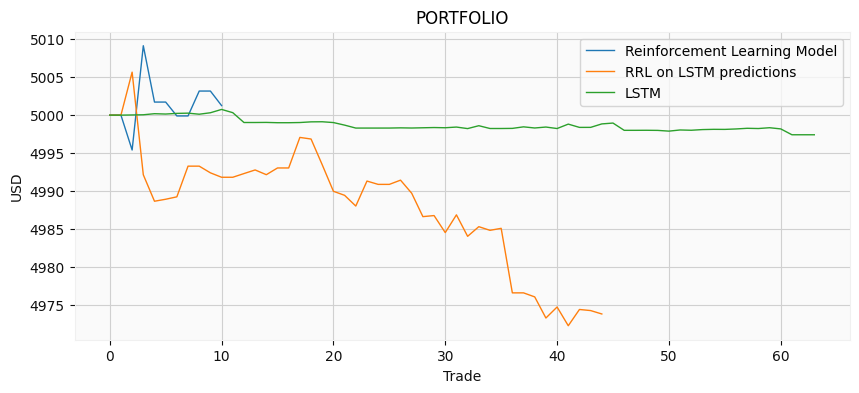

In [45]:
plt.figure(figsize=(10,4))
plt.plot(total_rrl, label="Reinforcement Learning Model", linewidth=1)
plt.plot(total_rrl_lstm, label="RRL on LSTM predictions", linewidth=1)
plt.plot(total_lstm, label="LSTM", linewidth=1)
plt.xlabel('Trade')
plt.ylabel('USD')
plt.legend()
plt.title("PORTFOLIO")

In [46]:
def trade_short(positions, stock_prices, usd=0, btc=5, fee=0):
    """
    Στην συγκεκριμένη στρατηγική πουλάμε όλα τα bitcoin που έχουμε,
    και αγοράζουμε την ίδια ποσότητα που πουλήσαμε όταν προβλέπουμε πως θα ξαναανέβει η τιμή
    """
    cnt = 0
    total = []
    total.append(usd + btc * stock_prices[0])
    short = False
    first_btc = copy.deepcopy(btc)
    print(f"Start with: {total[0]}")
    for index in range(len(positions) - 1): 
        
        if positions[index] > 0 and positions[index + 1] > 0  and usd > 0 and short and usd >= first_btc * stock_prices[index]:
            buy = copy.deepcopy(first_btc)
            btc = buy / stock_prices[index] + btc
            usd = usd - buy - (fee * buy)
            cnt += 1
            total.append(usd + btc * stock_prices.iloc[index])
            short = False
            continue

        # πουλάμε 
        if positions[index] < 0 and positions[index + 1] < 0 and btc > 0: 
            first_btc = copy.deepcopy(btc)
            usd = btc * stock_prices[index] + usd - (fee * btc)
            btc = 0
            cnt += 1
            total.append(usd + btc * stock_prices.iloc[index])
            short = True
            continue
        
    print(f"End with: {total[-1]}\nProfit: {total[-1] - total[0]}\n# of trades: {cnt}\n")
    
    return total

In [47]:
print("---RRL---")
total_rrl = trade_short(positions(x_test_rrn, theta), result['actual_close'].copy())
print("---RRL ON LSTM---")
total_rrl_lstm = trade_short(positions(x_lstm_test, theta), result['actual_close'].copy())
print("---LSTM---")
total_lstm = trade_short(result['prcnt_change'] * 100, result['actual_close'].copy())

---RRL---
Start with: 311018.65
End with: 311410.50172116066
Profit: 391.8517211606377
# of trades: 9

---RRL ON LSTM---
Start with: 311018.65
End with: 310992.5985245223
Profit: -26.05147547769593
# of trades: 11

---LSTM---
Start with: 311018.65
End with: 310921.8997538944
Profit: -96.75024610559922
# of trades: 12



Text(0.5, 1.0, 'PORTFOLIO')

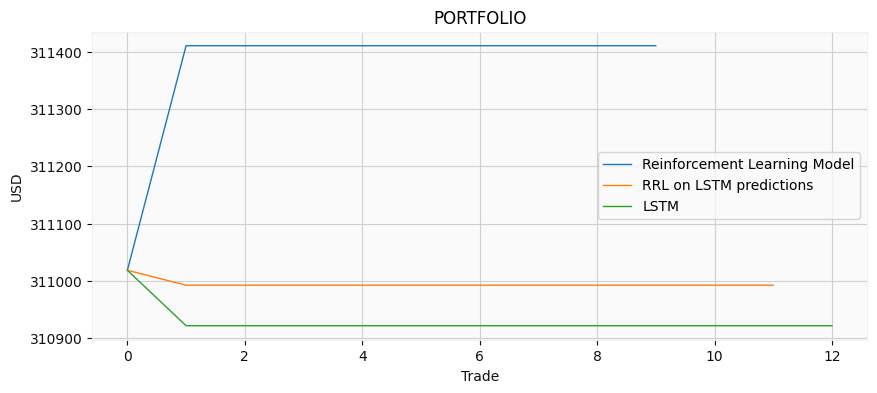

In [48]:
plt.figure(figsize=(10,4))
plt.plot(total_rrl, label="Reinforcement Learning Model", linewidth=1)
plt.plot(total_rrl_lstm, label="RRL on LSTM predictions", linewidth=1)
plt.plot(total_lstm, label="LSTM", linewidth=1)
plt.xlabel('Trade')
plt.ylabel('USD')
plt.legend()
plt.title("PORTFOLIO")

### BITCOIN

Mean Absolute Error: 52.86598930921043
Mean Square Error: 3918.654741283011
r2 score: 0.4279412742276615
Root Mean Square Error: 62.59915926977782

Sharpe ratio: 0.14654547353813138

MOST MONEY: RRL

### GOOGLE
Mean Absolute Error: 55.08198623322369
Mean Square Error: 5067.204416678182
r2 score: 0.6955341533943933
Root Mean Square Error: 71.18429894771867

Sharpe ratio: 0.13253165023099026

MOST MONEY RRL ON LSTM PREDICTIONS

### ETHEREUM
Mean Absolute Error: 243.10695993770557
Mean Square Error: 99001.11233636393
r2 score: 0.695495204635102
Root Mean Square Error: 314.6444220645965

Sharpe ratio: 0.10437209658136566

MOST MONEY: LSTM (with our trade_long function)
RRL was good too.

### TESLA
Mean Absolute Error: 9.877018577204975
Mean Square Error: 135.8194941936755
r2 score: 0.8060673485693894
Root Mean Square Error: 11.654162097451515

Sharpe ratio: 0.08658816403867708

MOST MONEY: RRL

### META (FB)
Mean Absolute Error: 11.718945166920227
Mean Square Error: 248.066754961451
r2 score: 0.9128601050851776
Root Mean Square Error: 15.750135077562065

Sharpe ratio: 0.09015055654695271

MOST MONEY: RRL on LSTM predictions
LSTM on short function was good too.




